In [1]:
import pandas as pd
from pandas import read_csv
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import os

In [2]:
def scan_size(path_im):
    ws = []
    hs = []
    
    for path in path_im:
        # récupération des images
        img = cv2.imread(path)
        img = cv2.pyrDown(img)
        img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # génération du masque de contour
        ret, thresh = cv2.threshold(img_grey, thresh=40, maxval=255, type=0)
        contours, hierarchy = cv2.findContours(thresh, 1, 2)

        # Récupération de la forme centrale
        middle_img = round(img.shape[0]/2)
        for contour in contours:
            if cv2.pointPolygonTest(contour,(middle_img,middle_img),False) == 1:
                cnt = contour
                continue

        # ciblage avec rectangle
        _,_,w,h = cv2.boundingRect(cnt)
        ws += [w]
        hs += [h]
        
    return ws, hs

In [3]:
im_path = glob.glob('../../../images_training_rev1/*.jpg')

In [4]:
ws, hs = scan_size(im_path)

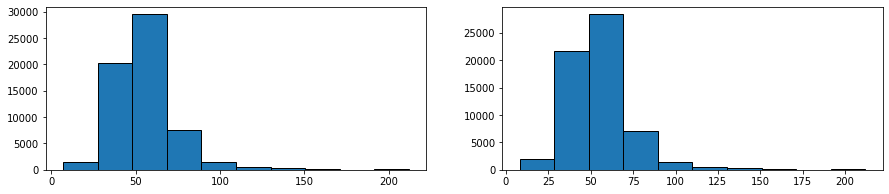

In [35]:
plt.figure(figsize=(15, 3))
plt.subplot(1, 2, 1)
plt.hist(ws, edgecolor='black');
plt.subplot(1, 2, 2)
plt.hist(hs, edgecolor='black');

In [75]:
size = 70

data = 0
for w in ws:
    if w <= size:
        data += 1
print(f'w <= {size} : {round(100*data/len(ws))}%')

data = 0
for h in hs:
    if h <= size:
        data += 1
print(f'h <= {size} : {round(100*data/len(hs))}%')

w <= 70 : 86%
h <= 70 : 86%


In [3]:
def crop_im(path_im):
    height_max = 0
    width_max = 0
    
    for path in path_im:
        # récupération nom de l'image
        im_name = os.path.basename(path)

        # récupération des images
        img = cv2.imread(path)
        img = cv2.pyrDown(img)
        img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # génération du masque de contour
        ret, thresh = cv2.threshold(img_grey, thresh=40, maxval=255, type=0)
        contours, hierarchy = cv2.findContours(thresh, 1, 2)

        # Récupération de la forme centrale
        middle_img = round(img.shape[0]/2)
        for contour in contours:
            if cv2.pointPolygonTest(contour,(middle_img,middle_img),False) == 1:
                cnt = contour
                continue

        # ciblage avec rectangle
        x,y,w,h = cv2.boundingRect(cnt)
        ws += [w]
        hs += [h]
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # récupération image inclue dans le rectangle
        img_crop = img[y:y+h, x:x+w]

        # sauvegarde nouvelle image
        new_folder = os.path.dirname(path) + '_resize/'
        cv2.imwrite(new_folder + im_name, img_crop)
        
        if h > height_max:
            height_max = h
        if w > width_max:
            width_max = w

    return ws, hs

In [4]:
ws, hs = crop_im(im_path)

In [40]:
black = np.zeros((size,size,3), np.uint8)
cv2.imwrite('./blacksquare.jpg',black)

True

In [71]:
def black_square(s_img, black_img):
    size = black_img.shape[0]
    
    # Recadrage de l'image si plus grande que le carré noir
    if s_img.shape[1] > size or s_img.shape[0] > size:
        ximg_offset= max(0, int((s_img.shape[1] - size) / 2 )) 
        yimg_offset= max(0, int((s_img.shape[0] - size) / 2 ))
        s_img = s_img[yimg_offset:yimg_offset+size, ximg_offset:ximg_offset+size]
    
    # Extension de l'image avec du noir
    x_offset= round((black_img.shape[1] - s_img.shape[1]) / 2 ) 
    y_offset= round((black_img.shape[0] - s_img.shape[0]) / 2 )
    black_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img
    return black_img

In [51]:
im_path_resize = glob.glob('../../../images_training_rev1_resize/*.jpg')

In [69]:
def black_square_dir(path_im_resize):
    for path in path_im_resize:
        # récupération nom de l'image
        im_name = os.path.basename(path)
        
        # récupération des images
        img = cv2.imread(path)

        # Mise à taille d'image identique
        black_img = cv2.imread("blacksquare.jpg")
        img_black = black_square(img, black_img)
        
        # sauvegarde nouvelle image
        new_folder = os.path.dirname(path) + '_black/'
        cv2.imwrite(new_folder + im_name, img_black)
        
    return img_black.shape

In [72]:
black_square_dir(im_path_resize)

(70, 70, 3)